In [1]:
import pandas as pd
import numpy as np

properties_2016 = pd.read_csv("../data/properties_2016.csv")
train_2016 = pd.read_csv("../data/train_2016_v2.csv")
# should only be training on properties that actually sold
df = train_2016.merge(properties_2016, on='parcelid', how='left')

C:\Users\gkamt\AppData\Local\Temp\ipykernel_11808\154297587.py:4: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv("../data/properties_2016.csv")


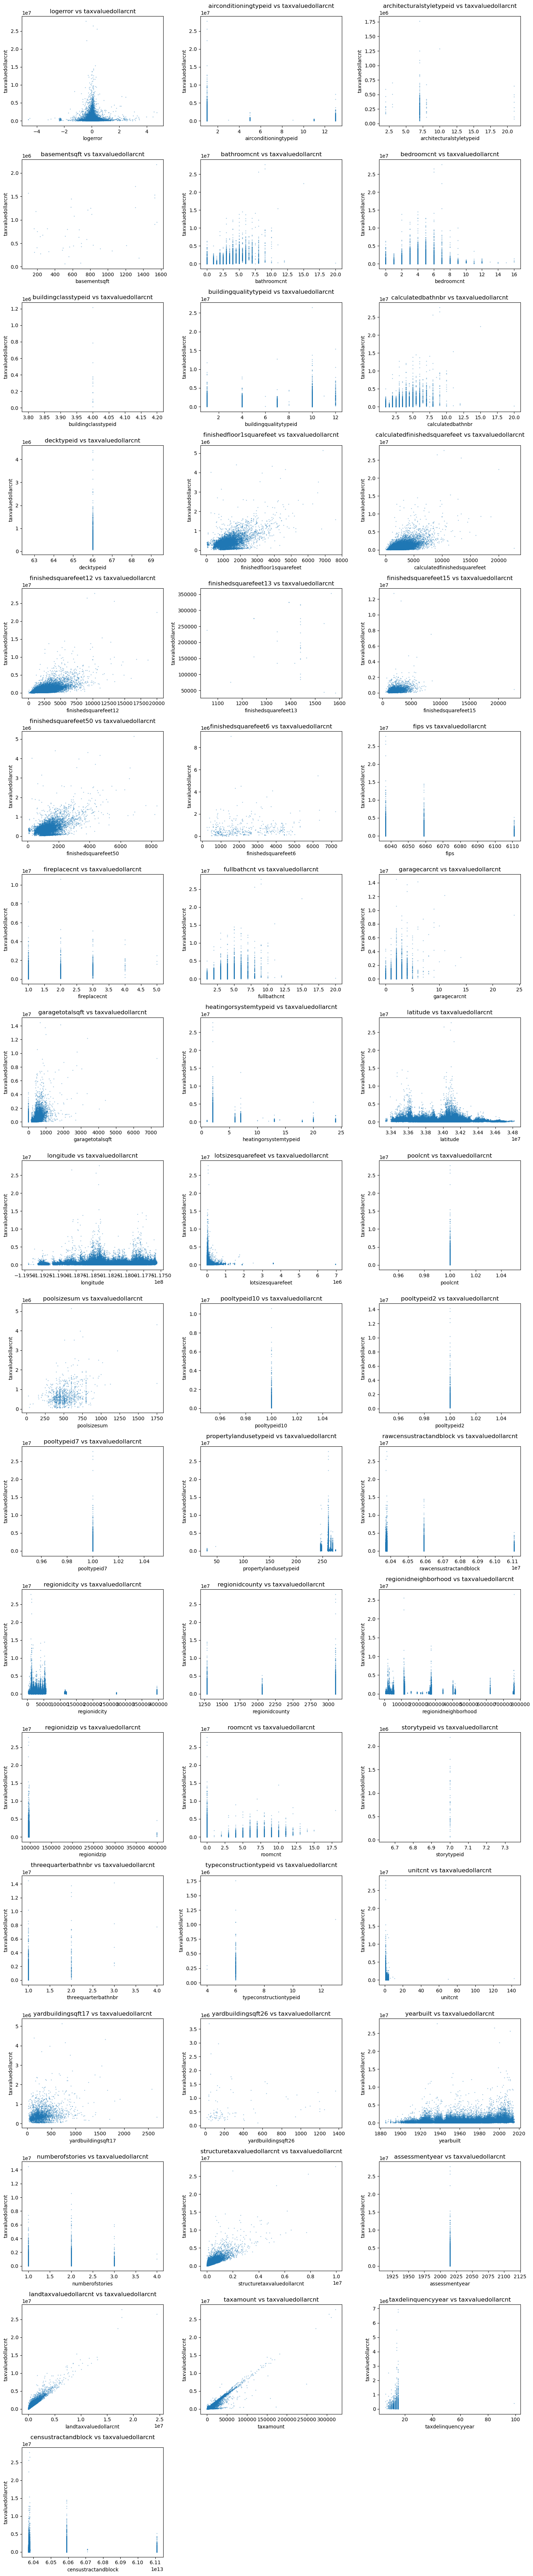

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# remove ID columns and columns you don't want to plot against themselves
cols_to_exclude = ['taxvaluedollarcnt', 'parcelid']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# subplots
n_cols = 3  # number of columns in the subplot grid
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# plot each numeric feature against taxvaluedollarcnt to see if relationships are linear or nonlinear
for idx, col in enumerate(numeric_cols):
    axes[idx].scatter(df[col], df['taxvaluedollarcnt'], alpha=0.3, s=1)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('taxvaluedollarcnt')
    axes[idx].set_title(f'{col} vs taxvaluedollarcnt')
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

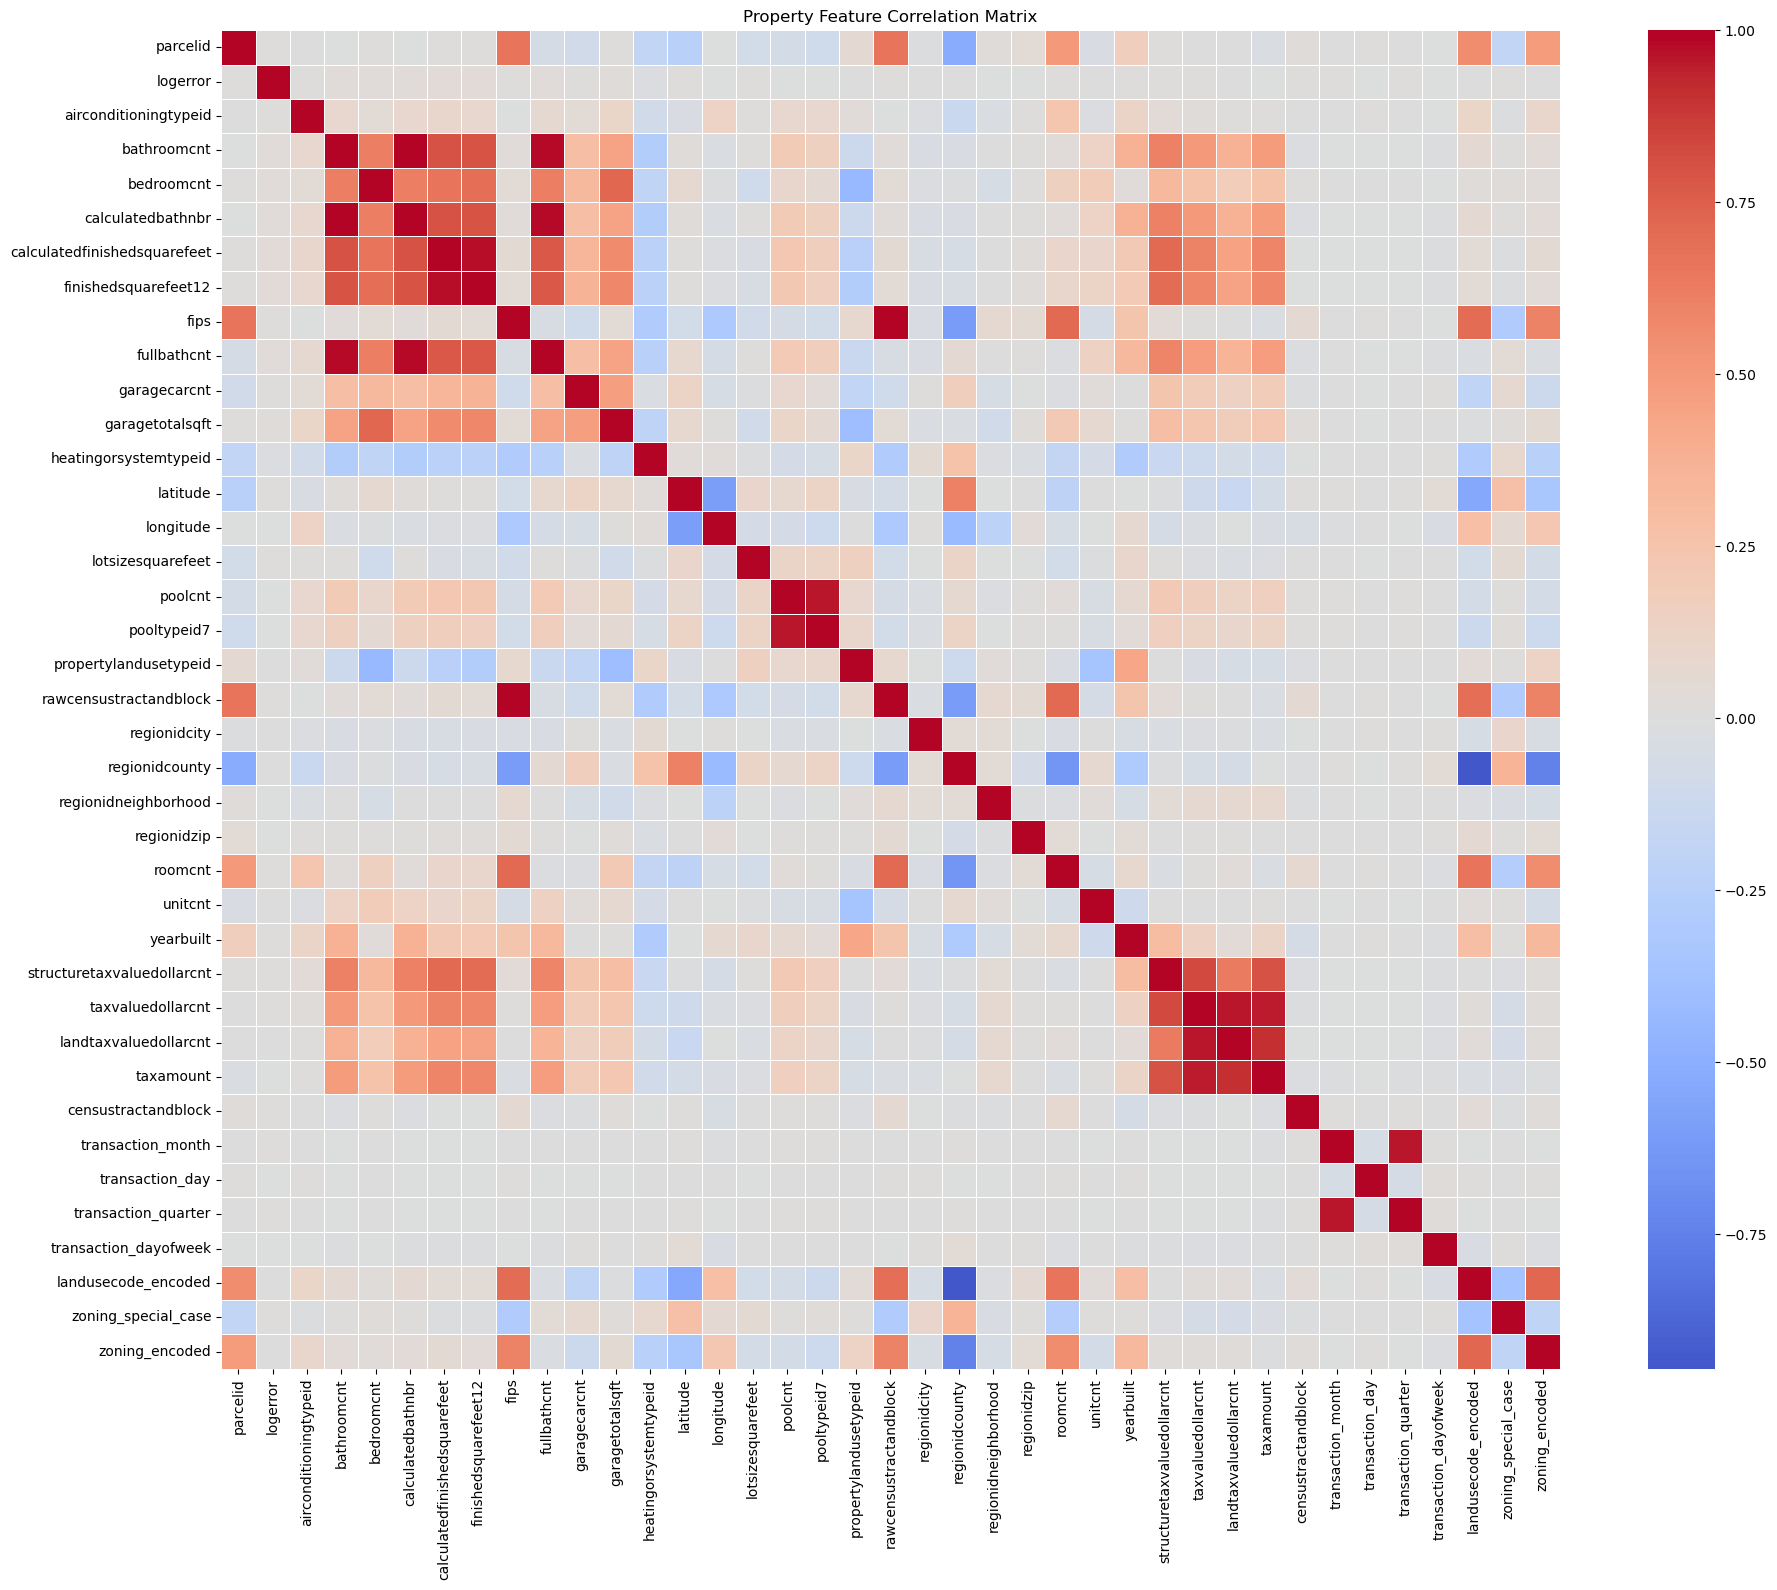

In [3]:
df_filled = pd.read_csv("imputed.csv")

# correlation matrix
correlation = df_filled.corr()

# plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Property Feature Correlation Matrix')
plt.tight_layout()
plt.show()

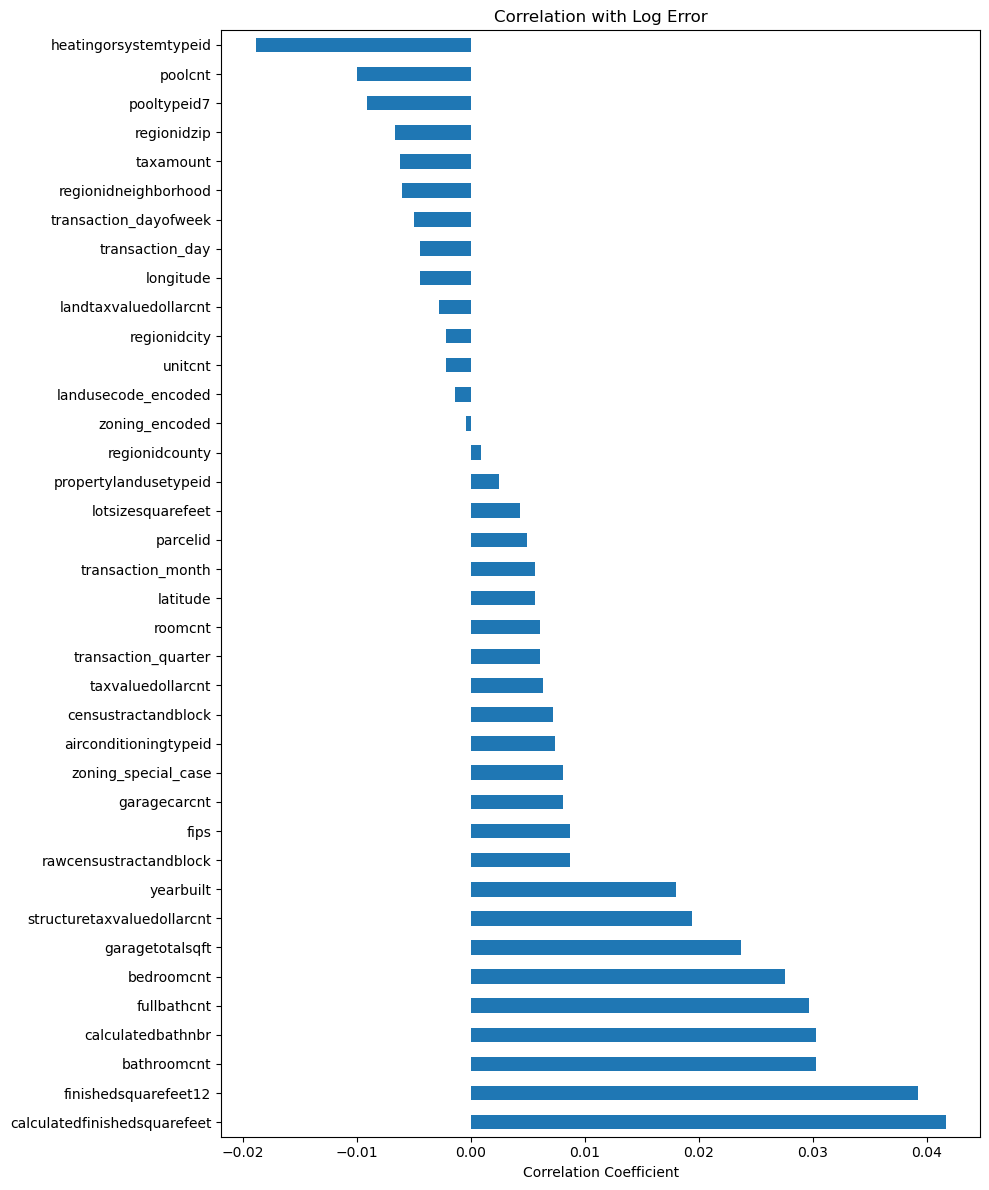

Top 10 positive correlations with logerror:
calculatedfinishedsquarefeet    0.041642
finishedsquarefeet12            0.039224
bathroomcnt                     0.030256
calculatedbathnbr               0.030256
fullbathcnt                     0.029697
bedroomcnt                      0.027535
garagetotalsqft                 0.023674
structuretaxvaluedollarcnt      0.019394
yearbuilt                       0.017955
rawcensustractandblock          0.008723
Name: logerror, dtype: float64

Top 10 negative correlations with logerror:
landtaxvaluedollarcnt   -0.002846
longitude               -0.004483
transaction_day         -0.004528
transaction_dayofweek   -0.004995
regionidneighborhood    -0.006077
taxamount               -0.006203
regionidzip             -0.006712
pooltypeid7             -0.009112
poolcnt                 -0.010025
heatingorsystemtypeid   -0.018906
Name: logerror, dtype: float64


In [4]:
# plot correlations with target variable (logerror)
plt.figure(figsize=(10, 12))
target_corr = correlation['logerror'].sort_values(ascending=False)

# exclude logerror's correlation with itself
target_corr = target_corr.drop('logerror')

target_corr.plot(kind='barh')
plt.title('Correlation with Log Error')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# print highest positive and negative correlations with logerror
print("Top 10 positive correlations with logerror:")
print(target_corr.head(10))
print("\nTop 10 negative correlations with logerror:")
print(target_corr.tail(10))